Application of package albumentations for image processing

In [1]:
import albumentations as alb
import os,random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

To pass an image to the augmentation pipeline, you need to read it from the disk. The pipeline expects to receive an image in the form of a NumPy array
To define an augmentation pipeline, you need to create an instance of the Compose class. As an argument to the Compose class, you need to pass a list of augmentations you want to apply. A call to Compose will return a transform function that will perform image augmentation.
```python
transform = alb.Compose([
    alb.RandomCrop(width=256, height=256),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
])
```
To create an augmentation, you create an instance of the required augmentation class and pass augmentation parameters to it. A.RandomCrop receives two parameters, height and width. A.RandomCrop(width=256, height=256) means that A.RandomCrop will take an input image, extract a random patch with size 256 by 256 pixels from it and then pass the result to the next augmentation in the pipeline (in this case to A.HorizontalFlip).

A.HorizontalFlip in this example has one parameter named p. p is a special parameter that is supported by almost all augmentations. It controls the probability of applying the augmentation. p=0.5 means that with a probability of 50%, the transform will flip the image horizontally, and with a probability of 50%, the transform won't modify the input image.

A.RandomBrighntessContrast in the example also has one parameter, p. With a probability of 20%, this augmentation will change the brightness and contrast of the image received from A.HorizontalFlip. And with a probability of 80%, it will keep the received image unchanged.

https://albumentations.ai/docs/images/getting_started/augmenting_images/augmentation_pipeline_visualized.jpg`


In [3]:
pillow_image = Image.open("random_image.png")
img = pillow_image.convert("RGB")
image_vec = np.array(img)
print(image_vec.shape)
print(image_vec.ndim)

(190, 266, 3)
3


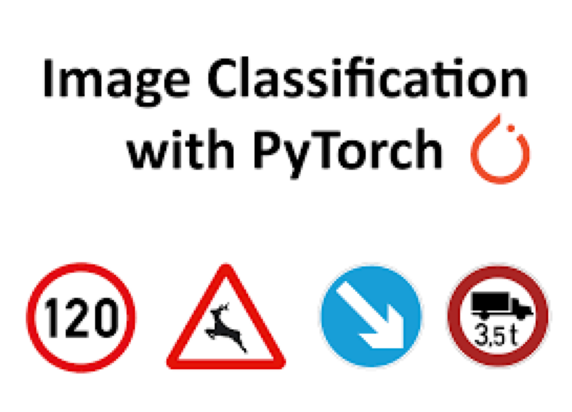

In [4]:
visualize(image_vec)

In [5]:
image_transformer = alb.Compose([
    alb.RandomCrop(width=100, height=100),
    alb.HorizontalFlip(p=0.3),
    alb.RandomBrightnessContrast(p=0.2),
    ])

In [6]:
transformed = image_transformer(image=image_vec)
print(transformed['image'].shape)

(100, 100, 3)


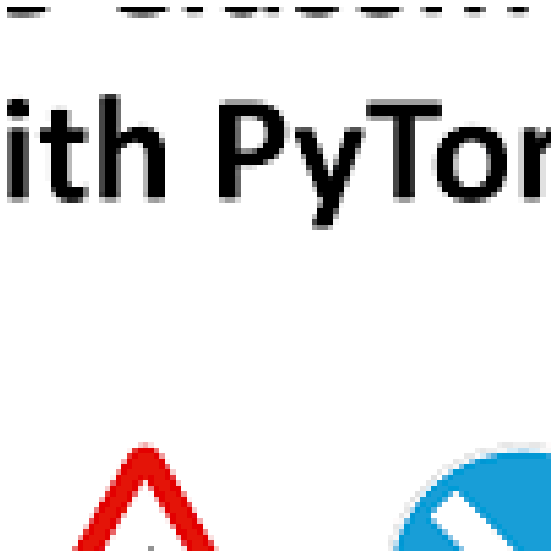

In [7]:
visualize(transformed['image']) 

Lets do it showcasing each process independently

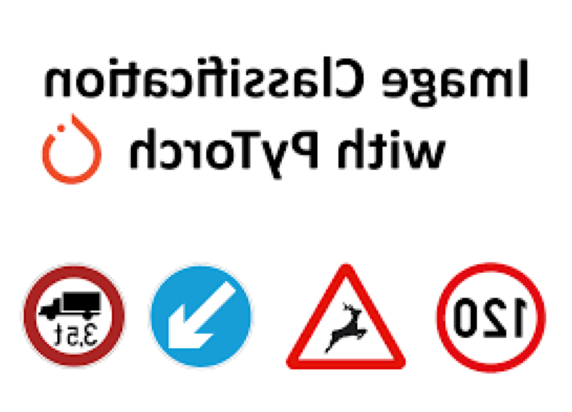

In [8]:
# random flip-Flip the input horizontally around the y-axis.
transform = alb.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=image_vec)['image']
visualize(augmented_image)

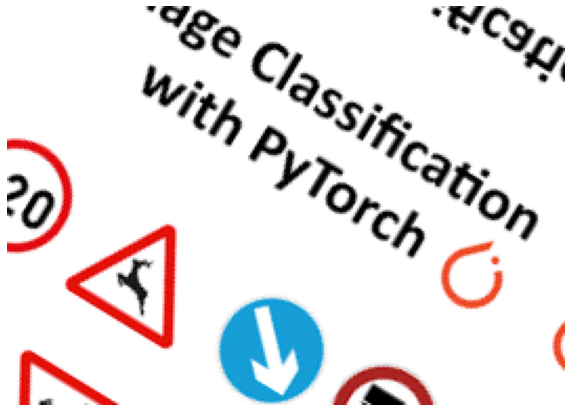

In [9]:
# shift-scale-rotate- Randomly apply affine transforms: translate, scale and rotate the input.
transform = alb.ShiftScaleRotate(p=0.5)
random.seed(7)
augmented_image = transform(image=image_vec)['image']
visualize(augmented_image)

advanced application of albumentations for image processing

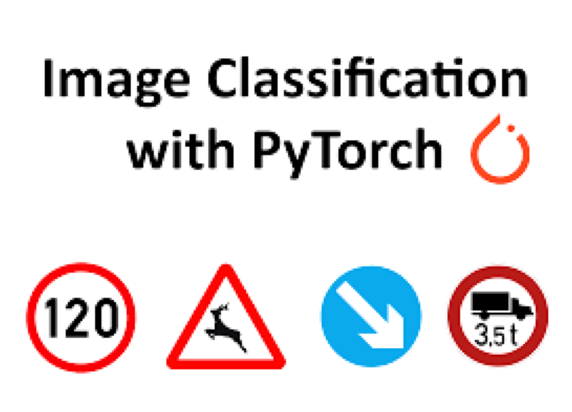

In [11]:
# Randomly change brightness and contrast of the input image.
trasform = alb.RandomBrightnessContrast(p=0.2)
augmented_image = trasform(image=image_vec)['image']
visualize(augmented_image)

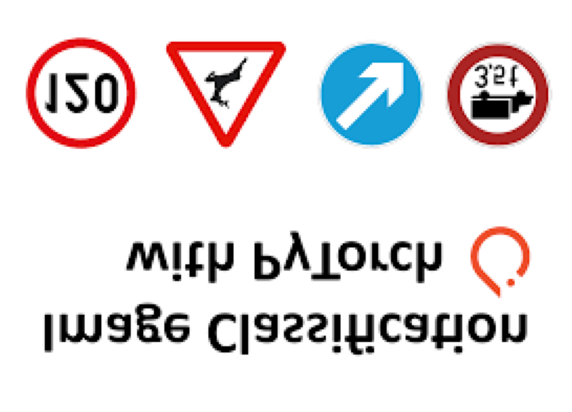

In [13]:
# Flip the input either horizontally, vertically or both horizontally and vertically
transform = alb.Flip()
augmented_image = transform(image=image_vec)['image']
visualize(augmented_image)

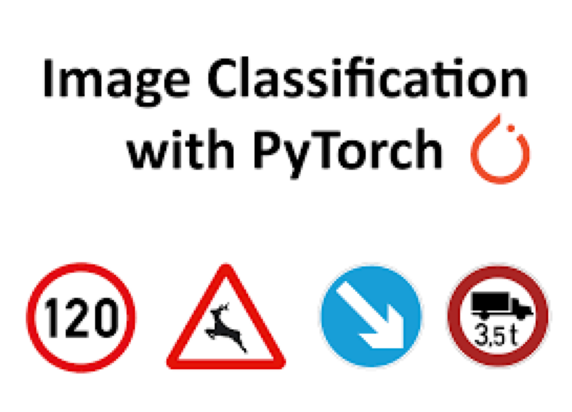

In [16]:
# Transpose the input by swapping rows and columns.
trasform = alb.Transpose(p=0.1)
augmented_image = trasform(image=image_vec)['image']
visualize(augmented_image)

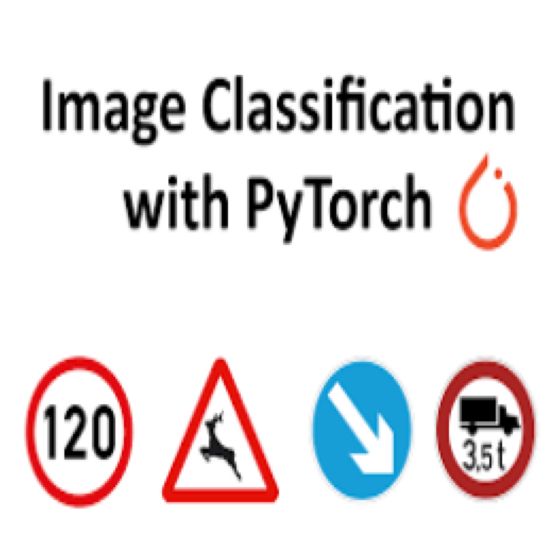

In [17]:
# Resize the input to the given height and width.
transform = alb.Resize(height=256, width=256)
augmented_image = transform(image=image_vec)['image']
visualize(augmented_image)

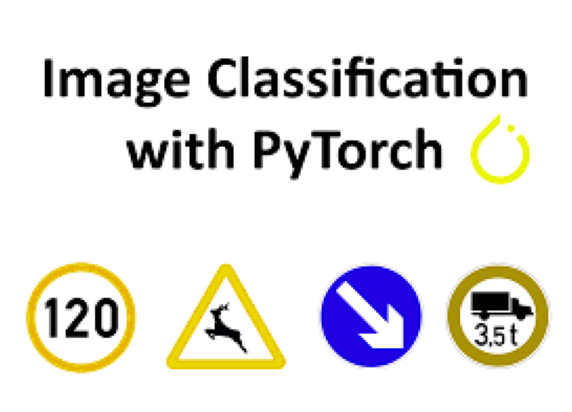

In [19]:
# Randomly changes the brightness, contrast, and saturation of an image
transform = alb.ColorJitter()
augmented_image = transform(image=image_vec)['image']
visualize(augmented_image)

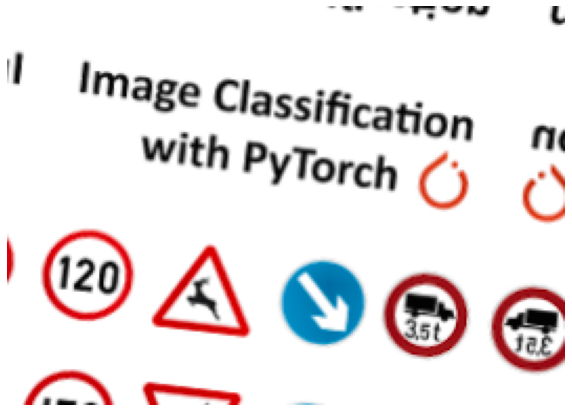

In [10]:
# mutiple transforms
transform = alb.Compose([
        alb.RandomRotate90(),
        alb.Flip(),
        alb.Transpose(),
        alb.GaussNoise(),
        alb.OneOf([
            alb.MotionBlur(p=.2),
            alb.MedianBlur(blur_limit=3, p=0.1),
            alb.Blur(blur_limit=3, p=0.1),
        ], 
        p=0.2),
        alb.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        alb.OneOf([
            alb.OpticalDistortion(p=0.3),
            alb.GridDistortion(p=.1),
        ], p=0.2),
        alb.OneOf([
            alb.CLAHE(clip_limit=2),
            alb.RandomBrightnessContrast(),
        ], p=0.3),
        alb.HueSaturationValue(p=0.3),
    ])
random.seed(42)
augmented_image = transform(image=image_vec)['image']
visualize(augmented_image)